# Module Tests

This jupyter notebook serves to tests and shows the different module of the NQS library with Tensorflow 2.

## Import and Environment Setup

In [1]:
import sys
sys.path.append(r'../')

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

## Set the same seed
np.random.seed(42)
tf.random.set_seed(42)

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
## Set the GPU devices here, -1 will use CPU
import os
os.environ["CUDA_VISIBLE_DEVICES"]="-1"

physical_devices = tf.config.list_physical_devices('GPU')
try:
  tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
  pass

## Graph

### Hypercube

In [3]:
from graph import Hypercube

## Simple 1D hypercube with 4 particles, nearest-neighbour interaction, and with periodic boundary conditions
chain1d = Hypercube(length=4, dimension=1, pbc=True, next_nearest=False)

print('Nearest-neighbour interaction:', chain1d.bonds)
print('=========')

## Simple 1D hypercube with 4 particles, nearest-neighbour interaction, next nearest-neighbour interaction,and periodic boundary conditions
chain1d_j1j2 = Hypercube(length=4, dimension=1, pbc=False, next_nearest=True)

print('Nearest-neighbour interaction:', chain1d_j1j2.bonds)
print('Next nearest-neighbour interaction:', chain1d_j1j2.bonds_next)
print('=========')

## Simple 2D hypercube with 3x3 particles and open boundary conditions
chain2d = Hypercube(length=3, dimension=2, pbc=False, next_nearest=False)

## Simple 3D hypercube with 3x3x3 particles and open boundary conditions
chain3d = Hypercube(length=3, dimension=3, pbc=False, next_nearest=False)

Nearest-neighbour interaction: [(0, 1), (0, 3), (1, 2), (2, 3)]
Nearest-neighbour interaction: [(0, 1), (1, 2), (2, 3)]
Next nearest-neighbour interaction: [(0, 2), (1, 3)]


### Network

In [4]:
### Use networkx, possibility to have different heights and widths
from graph import Network
import networkx as nx

g = nx.grid_graph([3], True)

chain1d_nx = Network(g, True)
print('Bonds 1d:', chain1d_nx.bonds)
print('Bonds 1d:', [(chain1d_nx._point_to_coordinate(a), chain1d_nx._point_to_coordinate(b)) for (a,b) in chain1d_nx.bonds])

g = nx.grid_graph([4,2], False)

chain2d_nx = Network(g, False)
print('Bonds 2d:', chain2d_nx.bonds)
print('Bonds 2d:', [(chain2d_nx._point_to_coordinate(a), chain2d_nx._point_to_coordinate(b)) for (a,b) in chain2d_nx.bonds])


Bonds 1d: [(0, 1), (0, 2), (1, 2)]
Bonds 1d: [([0], [1]), ([0], [2]), ([1], [2])]
Bonds 2d: [(0, 1), (0, 2), (1, 3), (2, 3), (2, 4), (3, 5), (4, 5), (4, 6), (5, 7), (6, 7)]
Bonds 2d: [([0, 0], [1, 0]), ([0, 0], [0, 1]), ([1, 0], [1, 1]), ([0, 1], [1, 1]), ([0, 1], [0, 2]), ([1, 1], [1, 2]), ([0, 2], [1, 2]), ([0, 2], [0, 3]), ([1, 2], [1, 3]), ([0, 3], [1, 3])]


## Hamiltonian 

**Ising**

$H_I = -J \sum_{<i,j>} \sigma^z_i \sigma^z_j -h \sum_{i} \sigma^x_i $

**Ising J1-J2**

$H_{IJ} = -J_1 \sum_{<i,j>} \sigma^z_i \sigma^z_j -J_2 \sum_{<<i,j>>} \sigma^z_i \sigma^z_j - h \sum_{i} \sigma^x_i $ 

**Heisenberg**

$H_H = \sum_{<i,j>} J_z \sigma^z_i \sigma^z_j + J_y \sigma^y_i \sigma^y_j + J_x \sigma^x_i \sigma^x_j$

**Heisenberg J1-J2**

$H_{HJ} = J_1 \sum_{<i,j>} (\Delta \sigma^z_i \sigma^z_j + \sigma^y_i \sigma^y_j + \sigma^x_i \sigma^x_j) + J_2 \sum_{<i,j>} (\sigma^z_i \sigma^z_j + \sigma^y_i \sigma^y_j + \sigma^x_i \sigma^x_j$)


In [5]:
from hamiltonian import *

ising = Ising(chain1d, j=1.0, h=1.0)

ising_j1j2 = IsingJ1J2(chain1d_j1j2, j1=1.0, h=1.0, j2=0.5)

heisenberg = Heisenberg(chain1d, jx=-1.0, jy=-1.0, jz =2.0, total_sz = 0)

heisenberg_j1j2 = HeisenbergJ1J2(chain1d_j1j2, j1=1.0, delta=1.0, j2=0.1, total_sz = 0)

### Exact diagonalisation

Ground state energy -5.22625185950551
Probability of configurations at the ground state [0.33251454 0.03125    0.03125    0.01830583 0.03125    0.0058738
 0.01830583 0.03125    0.03125    0.01830583 0.0058738  0.03125
 0.01830583 0.03125    0.03125    0.33251454]


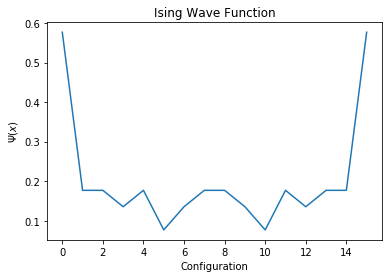

In [6]:
# Diagonalise the Ising model

## for systems of up to 10 particles
ising.diagonalize()

## for systems of up to 20 particles
#ising.diagonalize_sparse()

print('Ground state energy', ising.get_gs_energy())
print('Probability of configurations at the ground state', ising.get_gs_probability())
plt.title('Ising Wave Function')
plt.plot(ising.get_gs())
plt.xlabel('Configuration')
plt.ylabel('$\Psi(x)$')
plt.show()

Ground state energy -10.928203230275525
Probability of configurations at the ground state [0.05283122 0.39433757 0.05283122 0.05283122 0.39433757 0.05283122]


/home/remmy/.pyenv/versions/3.7.5/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


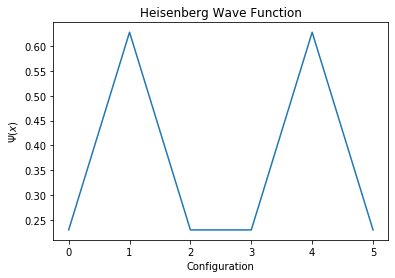

In [7]:
# Diagonalise the Heisenberg model

## for systems of up to 20 particles
heisenberg.diagonalize_sparse()

## The configurations are less due to the total sz = 0
print('Ground state energy', heisenberg.get_gs_energy())
print('Probability of configurations at the ground state', heisenberg.get_gs_probability())
plt.title('Heisenberg Wave Function')
plt.plot(heisenberg.get_gs())
plt.xlabel('Configuration')
plt.ylabel('$\Psi(x)$')
plt.show()

## Observable

In [8]:
#### 1D

from observable import *

chain1d_j1j2 = Hypercube(length=8, dimension=1, pbc=False, next_nearest=True)
ising_j1j2 = IsingJ1J2(chain1d_j1j2, j1=1.0, j2=-5.0, h=1.0)
ising_j1j2.diagonalize_sparse()

## Get all possible configurations
confs = []
num_particles = chain1d_j1j2.num_points
for i in range(2 ** num_particles):
    conf_bin = format(i, '#0%db' % (num_particles + 2))
    ## configuration in binary -1 1
    conf = np.array([1 if c == '1' else -1 for c in conf_bin[2:]])
    confs.append(conf)
    
corr_z = CorrelationZ(num_particles, 0)
print(corr_z.get_value_antiferro(ising_j1j2.get_gs_probability(), confs))
print(corr_z.get_value_ferro(ising_j1j2.get_gs_probability(), confs))

mz2 = MagnetizationZSquare(num_particles, chain1d.dimension)
print(mz2.get_value_antiferro(ising_j1j2.get_gs_probability(), confs))
print(mz2.get_value_ferro(ising_j1j2.get_gs_probability(), confs))

corr_nn_z = CorrelationNNZ(chain1d_j1j2)
print(corr_nn_z.get_value_antiferro(ising_j1j2.get_gs_probability(), confs))
print(corr_nn_z.get_value_ferro(ising_j1j2.get_gs_probability(), confs))

corr_n_z = CorrelationNZ(chain1d_j1j2)
print(corr_n_z.get_value_antiferro(ising_j1j2.get_gs_probability(), confs))
print(corr_n_z.get_value_ferro(ising_j1j2.get_gs_probability(), confs))

mx = MagnetizationX(chain1d_j1j2.num_points)
print(corr_n_z.get_value_antiferro(ising_j1j2.get_gs_probability(), confs))
print(corr_n_z.get_value_ferro(ising_j1j2.get_gs_probability(), confs))


-0.1372455323976858
-0.13888705059512224
0.0027223757059790326
0.0027404496417532264
0.9817835851278744
-0.9817835851278744
-0.13890755150845063
0.13890755150845063
-0.13890755150845063
0.13890755150845063


In [9]:
#### 2D

from observable import *

chain2d = Hypercube(length=4, dimension=2, pbc=True, next_nearest=False)
ising_2d = Ising(chain2d, j=-2.0, h=1.0)
ising_2d.diagonalize_sparse()

## Get all possible configurations
confs = []
num_particles = chain2d.num_points
for i in range(2 ** num_particles):
    conf_bin = format(i, '#0%db' % (num_particles + 2))
    ## configuration in binary -1 1
    conf = np.array([1 if c == '1' else -1 for c in conf_bin[2:]])
    confs.append(conf)

## middle position for 2D, use d_0 = numrows and d_1 = numrows * 2 to get the middle row
numrows = chain2d.length
pos =  int(numrows * (numrows / 2 - 1) + (numrows / 2))
corr_z = CorrelationZ( num_particles, position=pos, d_0=numrows, d_1=numrows*2)
#print(corr_z.get_value())
print(corr_z.get_value_antiferro(ising_2d.get_gs_probability(), confs, position=pos))
print(corr_z.get_value_ferro(ising_2d.get_gs_probability(), confs, position=pos))

mz2 = MagnetizationZSquare(num_particles, chain2d.dimension)
print(mz2.get_value_antiferro(ising_2d.get_gs_probability(), confs))
print(mz2.get_value_ferro(ising_2d.get_gs_probability(), confs))


0.9842977084360119
-0.328120361682231
0.98526113132378
0.0009715772606027315


## Sampler

In [10]:
from sampler import Gibbs, MetropolisLocal, MetropolisExchange

gibbs = Gibbs(1000,1)
met_local = MetropolisLocal(1000, 100)
met_exchange = MetropolisExchange(1000, 100)

samples = gibbs.get_initial_random_samples(chain1d.length)
print(samples)

tf.Tensor(
[[ 1.  1.  1. -1.]
 [-1. -1.  1.  1.]
 [ 1.  1. -1. -1.]
 ...
 [ 1. -1. -1.  1.]
 [-1. -1.  1. -1.]
 [-1.  1.  1.  1.]], shape=(1000, 4), dtype=float32)


## Model

In [11]:
## RBM

from model.rbm.realpos import RBMRealPos
from functools import partial

initializer = partial(np.random.normal, loc= 0.0, scale=0.01)
rbm = RBMRealPos(chain1d.length, density=2, initializer= initializer)

In [12]:
## MLP

from model.mlp.realpos import MLPRealPos

mlp = MLPRealPos(chain1d.length, [8])


## Learner

In [13]:
from learner import Learner

learning_rate = 0.001
trainer = tf.keras.optimizers.RMSprop(learning_rate)
num_epochs = 500

learner = Learner(ising, rbm, gibbs, trainer, num_epochs = num_epochs, 
                  stopping_threshold=0.001, reference_energy=ising.get_gs_energy())
learner.learn()

===== Training start
Epoch: 0, energy: -4.0240, std: 1.8933, std / mean: 0.4705, relerror: 0.23004, time: 0.03316
Epoch: 1, energy: -3.9280, std: 1.9739, std / mean: 0.5025, relerror: 0.24841, time: 0.01220
Epoch: 2, energy: -4.0319, std: 1.9900, std / mean: 0.4936, relerror: 0.22852, time: 0.01210
Epoch: 3, energy: -4.0398, std: 1.9233, std / mean: 0.4761, relerror: 0.22702, time: 0.01205
Epoch: 4, energy: -4.0589, std: 2.1303, std / mean: 0.5249, relerror: 0.22337, time: 0.01204
Epoch: 5, energy: -3.9931, std: 1.9951, std / mean: 0.4996, relerror: 0.23596, time: 0.01200
Epoch: 6, energy: -4.0279, std: 2.1274, std / mean: 0.5282, relerror: 0.22929, time: 0.01207
Epoch: 7, energy: -4.0357, std: 2.0505, std / mean: 0.5081, relerror: 0.22781, time: 0.01204
Epoch: 8, energy: -3.8598, std: 2.0355, std / mean: 0.5274, relerror: 0.26146, time: 0.01201
Epoch: 9, energy: -3.9885, std: 1.9751, std / mean: 0.4952, relerror: 0.23683, time: 0.01220
Epoch: 10, energy: -4.0957, std: 2.0066, std / me

Epoch: 88, energy: -4.4046, std: 1.7885, std / mean: 0.4061, relerror: 0.15722, time: 0.01734
Epoch: 89, energy: -4.4752, std: 1.6612, std / mean: 0.3712, relerror: 0.14370, time: 0.01598
Epoch: 90, energy: -4.3733, std: 1.7621, std / mean: 0.4029, relerror: 0.16321, time: 0.01622
Epoch: 91, energy: -4.4643, std: 1.7070, std / mean: 0.3824, relerror: 0.14578, time: 0.01479
Epoch: 92, energy: -4.4008, std: 1.7360, std / mean: 0.3945, relerror: 0.15795, time: 0.02046
Epoch: 93, energy: -4.5985, std: 1.7409, std / mean: 0.3786, relerror: 0.12011, time: 0.02803
Epoch: 94, energy: -4.4610, std: 1.7295, std / mean: 0.3877, relerror: 0.14643, time: 0.02462
Epoch: 95, energy: -4.5020, std: 1.6859, std / mean: 0.3745, relerror: 0.13858, time: 0.02217
Epoch: 96, energy: -4.5379, std: 1.6947, std / mean: 0.3735, relerror: 0.13171, time: 0.02135
Epoch: 97, energy: -4.4853, std: 1.7392, std / mean: 0.3878, relerror: 0.14177, time: 0.01879
Epoch: 98, energy: -4.5240, std: 1.6920, std / mean: 0.3740,

Epoch: 182, energy: -5.1004, std: 0.7802, std / mean: 0.1530, relerror: 0.02409, time: 0.01344
Epoch: 183, energy: -5.0737, std: 0.7858, std / mean: 0.1549, relerror: 0.02918, time: 0.01241
Epoch: 184, energy: -5.0816, std: 0.7582, std / mean: 0.1492, relerror: 0.02769, time: 0.01227
Epoch: 185, energy: -5.1162, std: 0.7549, std / mean: 0.1475, relerror: 0.02106, time: 0.01279
Epoch: 186, energy: -5.1091, std: 0.7274, std / mean: 0.1424, relerror: 0.02241, time: 0.01214
Epoch: 187, energy: -5.1238, std: 0.6680, std / mean: 0.1304, relerror: 0.01960, time: 0.01220
Epoch: 188, energy: -5.0669, std: 0.8159, std / mean: 0.1610, relerror: 0.03050, time: 0.01228
Epoch: 189, energy: -5.0706, std: 0.7785, std / mean: 0.1535, relerror: 0.02978, time: 0.01215
Epoch: 190, energy: -5.1178, std: 0.7025, std / mean: 0.1373, relerror: 0.02075, time: 0.01215
Epoch: 191, energy: -5.1295, std: 0.7268, std / mean: 0.1417, relerror: 0.01850, time: 0.01213
Epoch: 192, energy: -5.0988, std: 0.7577, std / me

Epoch: 279, energy: -5.1911, std: 0.5186, std / mean: 0.0999, relerror: 0.00673, time: 0.01317
Epoch: 280, energy: -5.1944, std: 0.5430, std / mean: 0.1045, relerror: 0.00609, time: 0.01255
Epoch: 281, energy: -5.1989, std: 0.5069, std / mean: 0.0975, relerror: 0.00524, time: 0.01235
Epoch: 282, energy: -5.1701, std: 0.5580, std / mean: 0.1079, relerror: 0.01074, time: 0.01300
Epoch: 283, energy: -5.2068, std: 0.4929, std / mean: 0.0947, relerror: 0.00373, time: 0.01256
Epoch: 284, energy: -5.1588, std: 0.5767, std / mean: 0.1118, relerror: 0.01290, time: 0.01238
Epoch: 285, energy: -5.1798, std: 0.5261, std / mean: 0.1016, relerror: 0.00888, time: 0.01246
Epoch: 286, energy: -5.2008, std: 0.4777, std / mean: 0.0919, relerror: 0.00487, time: 0.01238
Epoch: 287, energy: -5.1779, std: 0.5457, std / mean: 0.1054, relerror: 0.00925, time: 0.01243
Epoch: 288, energy: -5.1809, std: 0.5148, std / mean: 0.0994, relerror: 0.00867, time: 0.01248
Epoch: 289, energy: -5.2149, std: 0.4297, std / me

Epoch: 373, energy: -5.1881, std: 0.4811, std / mean: 0.0927, relerror: 0.00730, time: 0.01370
Epoch: 374, energy: -5.1713, std: 0.5461, std / mean: 0.1056, relerror: 0.01052, time: 0.01231
Epoch: 375, energy: -5.1889, std: 0.5269, std / mean: 0.1015, relerror: 0.00715, time: 0.01370
Epoch: 376, energy: -5.1826, std: 0.5172, std / mean: 0.0998, relerror: 0.00836, time: 0.01249
Epoch: 377, energy: -5.1819, std: 0.5276, std / mean: 0.1018, relerror: 0.00849, time: 0.01842
Epoch: 378, energy: -5.1970, std: 0.4680, std / mean: 0.0901, relerror: 0.00559, time: 0.02622
Epoch: 379, energy: -5.1687, std: 0.5212, std / mean: 0.1008, relerror: 0.01102, time: 0.02655
Epoch: 380, energy: -5.1972, std: 0.4823, std / mean: 0.0928, relerror: 0.00555, time: 0.02770
Epoch: 381, energy: -5.2093, std: 0.4958, std / mean: 0.0952, relerror: 0.00325, time: 0.02428
Epoch: 382, energy: -5.2039, std: 0.5078, std / mean: 0.0976, relerror: 0.00428, time: 0.02201
Epoch: 383, energy: -5.2067, std: 0.4644, std / me

Epoch: 460, energy: -5.2040, std: 0.4391, std / mean: 0.0844, relerror: 0.00426, time: 0.01343
Epoch: 461, energy: -5.2118, std: 0.4325, std / mean: 0.0830, relerror: 0.00277, time: 0.01265
Epoch: 462, energy: -5.2101, std: 0.4082, std / mean: 0.0783, relerror: 0.00310, time: 0.01278
Epoch: 463, energy: -5.1743, std: 0.5039, std / mean: 0.0974, relerror: 0.00994, time: 0.01280
Epoch: 464, energy: -5.1782, std: 0.4960, std / mean: 0.0958, relerror: 0.00919, time: 0.01287
Epoch: 465, energy: -5.1856, std: 0.4430, std / mean: 0.0854, relerror: 0.00777, time: 0.01289
Epoch: 466, energy: -5.1969, std: 0.4259, std / mean: 0.0819, relerror: 0.00562, time: 0.01312
Epoch: 467, energy: -5.1991, std: 0.4049, std / mean: 0.0779, relerror: 0.00520, time: 0.01311
Epoch: 468, energy: -5.1887, std: 0.4675, std / mean: 0.0901, relerror: 0.00718, time: 0.01289
Epoch: 469, energy: -5.1983, std: 0.4031, std / mean: 0.0776, relerror: 0.00534, time: 0.01260
Epoch: 470, energy: -5.1932, std: 0.4482, std / me

## Logger

In [14]:
from logger import Logger 

result_path = 'result/'
subpath = 'test'
logger = Logger(result_path, subpath)
logger.log(learner)


===== Logging start
===== Model saved in result/ising_1d_4_1.000_1.000_pbc/rbmrealpos-8/test/1/model.p
===== Logging finish
